In [26]:
!pip install -q tpot
!pip install seaborn==0.9.0

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA
from scipy.stats.mstats import zscore
from pylab import savefig

from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import LocalOutlierFactor

import requests
import io

from tpot import TPOTRegressor

from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator
from sklearn.linear_model import ElasticNetCV

from google.colab import files  # para fazer download dos arquivos gerados no Colab

    100% |████████████████████████████████| 215kB 22.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
class Preprocessar:
    
    def processar(self, df):

        self.cols_del = ['url', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
        self.cols_norm = ['self_reference_max_shares', 'self_reference_min_shares', 
                         'self_reference_avg_sharess', 'n_tokens_content', 'num_imgs',
                         'num_keywords', 'timedelta', 'n_tokens_title', 'num_hrefs',
                         'num_self_hrefs']
        df.columns = [col.strip() for col in df.columns]

        # Normaliza as colunas cols_norm
        self.stats = pd.DataFrame(columns = ["feature", "min", "max", "mean", "std"])
        for col in self.cols_norm:            
            res = {"feature": col,
                   "min": df[col].min(),
                   "max": df[col].max(),
                   "mean": df[col].mean(),
                   "std": df[col].std()}
            self.stats = self.stats.append(res, ignore_index=True)
            df[col] = zscore(df[col])        
    
        df['shares'] = df['shares'].apply(np.log10)
    
        df.drop(self.cols_del, axis=1, inplace=True)

    def reverter_zscore(self, feature, value):
        feat_values = pre.stats[pre.stats['feature'] == feature].iloc[0]
        return feat_values['std'] * value + feat_values['mean']

In [3]:
url="https://raw.githubusercontent.com/lgscoding/MachineLearning/master/data/OnlineNewsPopularity.csv"
df = pd.read_csv(url)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.shape

(39644, 61)

In [5]:
df.apply(lambda a: a.isnull().sum(),axis=0)

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [6]:
pre = Preprocessar()
pre.processar(df)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.75788,0.757447,-0.695210,0.663594,1.0,0.815385,-0.607463,-0.335566,-0.426526,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,2.773055
1,1.75788,-0.661657,-0.618794,0.604743,1.0,0.791946,-0.695709,-0.594963,-0.426526,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,2.851870
2,1.75788,-0.661657,-0.712192,0.575130,1.0,0.663866,-0.695709,-0.594963,-0.426526,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,3.176091
3,1.75788,-0.661657,-0.032933,0.503788,1.0,0.665635,-0.166229,-0.854360,-0.426526,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,3.079181
4,1.75788,1.230482,1.115439,0.415646,1.0,0.540890,0.716237,4.074185,1.860061,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,2.703291


## Função para plotar os outliers existentes na base

In [0]:
def plotar(df, grupo, x_label="x", y_label="y", titulo=None):
        """
            @param res_algoritmo : pd.DataFrame, deve ter as seguintes colunas (x, y, grupo)
        """  
      
        # verifica quantos clusters tem 
        grupos = np.sort(df[grupo].unique())
        
        plots = []        
        for g in grupos:
            p = plt.scatter(df[df[grupo] == g].x, df[df[grupo] == g].y)
            plots.append(p)

        plt.legend(tuple(plots),
               (tuple(["{g} {x}".format(g=grupo, x = str(c)) for c in grupos])), 
               loc=2, fontsize=8, bbox_to_anchor=(1.05, 1))
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(titulo)
        plt.show()


## Análise de Outliers

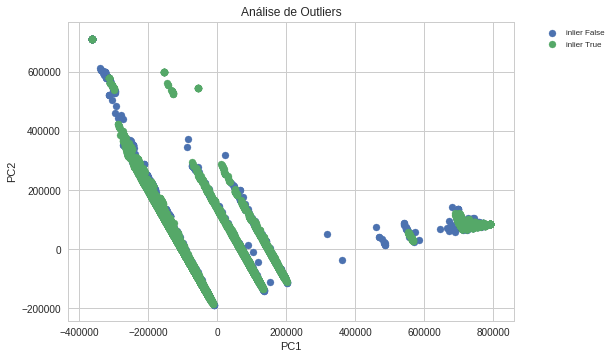

In [8]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier = clf.fit_predict(df)
df['inlier'] = [True if x == 1 else False for x in outlier]

X = df.loc[:, df.columns != 'shares']
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)

df['x'] = pca_X[:,0]
df['y'] = pca_X[:,1]

plotar(df, "inlier", "PC1", "PC2", "Análise de Outliers")

## Filtrando os Outliers

In [9]:
df_sem_outlier = df[df['inlier'] == False]
df_sem_outlier.drop(['inlier', 'x', 'y'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Separação das features e target

In [0]:
X = df_sem_outlier.loc[:, df_sem_outlier.columns != 'shares']
y = df_sem_outlier.loc[:, df_sem_outlier.columns == 'shares']

## Grid Search para os algoritmos que serão analisados:


*  Random Forest Regressor
*  ElasticNet
* SVM
* Regressão Linear



In [0]:
grid = {"elasticnet": {
            'alpha': [0.5, 1.0, 1.5],
            'l1_ratio': [0.25, 0.5, 0.75]
            },
        "regressao_linear": {
            'fit_intercept': [True, False]
            }, 
        "svm": {
            'kernel': ['rbf', 'linear','sigmoid'],
            'C': [0.01, 0,100]
            },
        "random_forest": {
            'max_features': ['auto', 'sqrt'],
            'n_estimators': [200, 500]
            }
        }

In [0]:
algoritmos = {'elasticnet': ElasticNet(random_state=0, alpha = 1.5, l1_ratio = 0.75) ,
              'svm': SVR(kernel = 'rbf', C = 100),
              'regressao_linear': LinearRegression(fit_intercept = False),
              'random_forest': RandomForestRegressor(random_state=0, max_features = 'sqrt', n_estimators=500)}


In [15]:
"""
resultado_grid = {}

for a in algoritmos:
    grid_search = GridSearchCV(algoritmos[a], grid[a], cv=5)
    grid_search.fit(X, y)
    resultado_grid[a] = grid_search
"""

'\nresultado_grid = {}\n\nfor a in algoritmos:\n    grid_search = GridSearchCV(algoritmos[a], grid[a], cv=5)\n    grid_search.fit(X, y)\n    resultado_grid[a] = grid_search\n'

## Split da base em treino (70%) e teste (30%)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Execução dos Algoritmos

In [0]:
"""
algoritmos = {'elasticnet': ElasticNet(resultado_grid['elasticnet'].best_params_),\
              'svm':        SVR(resultado_grid['svm'].best_params_),\
              'regressao_linear': LinearRegression(resultado_grid['regressao_linear'].best_params_),\
              'random_forest': RandomForestRegressor(resultado_grid['random_forest'].best_params_)}
"""      

In [16]:
resultados = pd.DataFrame(columns=['algoritmo', 'parametros', 'score_treino', 
                                   'score_teste', "evs", "mae", "mse", "msle"])

predicts = y_test.reset_index()

for nome_alg in algoritmos:
    alg = algoritmos[nome_alg]
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    predicts['pred_' + nome_alg] = y_pred
    res = {"algoritmo": nome_alg,
           "parametros": None,
           "score_treino": alg.score(X_train, y_train),
           "score_teste": alg.score(X_test, y_test),
           "evs": metrics.explained_variance_score(y_test, y_pred),
           "mae": metrics.mean_absolute_error(y_test, y_pred),
           "mse": metrics.mean_squared_error(y_test, y_pred),
           "msle": metrics.mean_squared_log_error(y_test, y_pred)}#None}

    resultados = resultados.append(res, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [17]:
resultados

,algoritmo,parametros,score_treino,score_teste,evs,mae,mse,msle
0,elasticnet,None,0.061922,0.083592,0.083642,0.342678,0.207691,0.010581
1,svm,None,0.954667,0.013183,0.015164,0.360590,0.223648,0.011328
2,regressao_linear,None,0.125333,0.092393,0.092462,0.339157,0.205696,0.010443
3,random_forest,None,0.880729,0.134511,0.135064,0.332257,0.196151,0.009912


## Utilização do autoML para construção do melhor modelo

In [0]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_shares_pipeline.py')
files.download('tpot_shares_pipeline.py')

In [0]:
pipeline = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.8500000000000001, tol=0.0001)),
    RandomForestRegressor(bootstrap=True, max_features=0.8, min_samples_leaf=14, min_samples_split=13, n_estimators=100)
)

## Aplicação do melhor modelo gerador pelo AutoML

In [22]:
pipeline.fit(X_train, y_train)
results = pipeline.predict(X_test)

res = {"algoritmo": 'stacking',
           "parametros": None,
           "score_treino": pipeline.score(X_train, y_train),
           "score_teste": pipeline.score(X_test, results),
           "evs": metrics.explained_variance_score(y_test, results),
           "mae": metrics.mean_absolute_error(y_test, results),
           "mse": metrics.mean_squared_error(y_test, results),
           "msle": metrics.mean_squared_log_error(y_test, results)}

resultados = resultados.append(res, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [23]:
resultados

,algoritmo,parametros,score_treino,score_teste,evs,mae,mse,msle
0,elasticnet,None,0.061922,0.083592,0.083642,0.342678,0.207691,0.010581
1,svm,None,0.954667,0.013183,0.015164,0.360590,0.223648,0.011328
2,regressao_linear,None,0.125333,0.092393,0.092462,0.339157,0.205696,0.010443
3,random_forest,None,0.880729,0.134511,0.135064,0.332257,0.196151,0.009912
4,stacking,None,0.437629,1.000000,0.139023,0.329617,0.195148,0.009879
5,stacking,None,0.431962,1.000000,0.137278,0.331082,0.195557,0.009899


Text(0.5,1,'Random Forest Regressor')

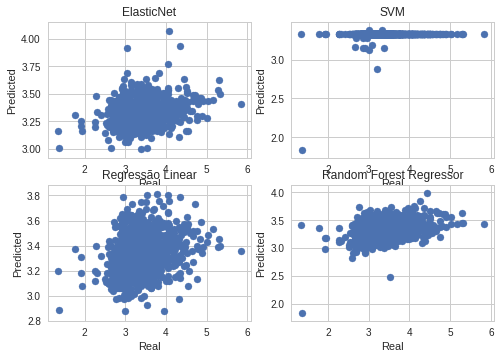

In [36]:
#@title
plt.subplot(2,2, 1)
en = plt.scatter(x="shares", y="pred_elasticnet", data=predicts)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("ElasticNet")
plt.subplot(2,2, 2)
sv = plt.scatter(x="shares", y="pred_svm", data=predicts)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("SVM")
plt.subplot(2,2, 3)
rl = plt.scatter(x="shares", y="pred_regressao_linear", data=predicts)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Regressão Linear")
plt.subplot(2,2, 4)
rf = plt.scatter(x="shares", y="pred_random_forest", data=predicts)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Random Forest Regressor")



Text(0.5,1,'Stacking')

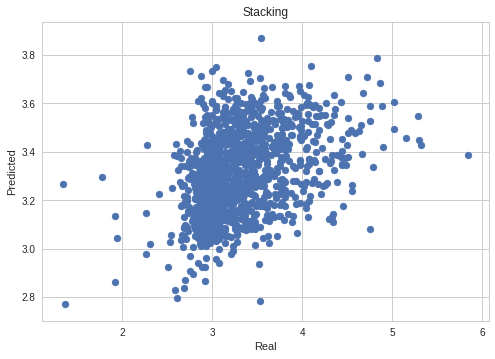

In [37]:
predicts['pred_stacking'] = results
plt.scatter(x="shares", y="pred_stacking", data=predicts)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Stacking")